# How much will coffee cost, tomorrow?

<img src="coffee.jpg">

Coffee is a relatable, lovable, two sided market. It serves as a cash crop for developing countries, providing a primary source of income for over 100 million people. In 2011 the coffee industry was valued at over 20 billion dollars, and coffee futures are traded on key finance exchanges every day alongside oil and gold. 

Coffee production occurs primarily in Brazil, Vietnam, Indonesia, and Columbia, with Brazil producing nearly twice as much coffee as Vietnam. Various beans are common to specific parts of the world, and hold different levels of value based on their perceived quality. Most of the world’s coffee industry, and therefore the price of coffee, is controlled by Kraft, Nestle, P&G, and Sara Lee. As one can see, there are a limited number of factors affecting the price of coffee as a commodity.
    
Because coffee futures are publicly traded, there is a huge incentive to accurately model the future price of the good. Some of the factors worth considering are weather forecasting in countries of production, changes in demand, economics of export and import laws, and the price of raw materials. This information can be freely accessed and integrated into a predictive model.

#Table of Contents

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
import requests
import json

#get coffee price data for arabica and robusta
page_a = requests.get("https://www.quandl.com/api/v3/datasets/CEPEA/COFFEE_A.json", params={"start_date": "2002-01-01", "end_date": "2011-12-31", "order": "asc"})
page_r = requests.get("https://www.quandl.com/api/v3/datasets/CEPEA/COFFEE_R.json", params={"start_date": "2002-01-01", "end_date": "2011-12-31", "order": "asc"})

df = pd.DataFrame(page_a.json()["dataset"]["data"], columns=["date", "arabica price"])
df['robusta price'] = pd.DataFrame(page_r.json()["dataset"]["data"], columns=["date", "price"])["price"]

In [58]:
#gets quandl data from a specific url, using the set params for start and end dates
#using datecol and datacol, get data from the appropriate rows
def get_datadict(url, datecol, datacol):
    page = requests.get(url, params={"start_date": "2002-01-01", "end_date": "2011-12-31", "order": "asc"})
    datadict = dict([(entry[datecol],entry[datacol]) for entry in page.json()["dataset"]["data"]])
    return datadict

def match_dailydates(datadict):
    col = []
    data = np.nan
    for d in df["date"]:
        if d in datadict:
            data = datadict[d]
        col.append(data)
    return col

def match_yearlydates(datadict):
    col = []
    data = np.nan
    for d in df["date"]:
        yr = int(d.split("-")[0])
        if yr in datadict:
            data = datadict[yr]
        col.append(data)
    return col

In [4]:
#arabica futures
df["futures price"] = match_dailydates(get_datadict("https://www.quandl.com/api/v3/datasets/CHRIS/ICE_KC2.json", 0, 1))
#global nasdaq index
df["nasdaq index"] = match_dailydates(get_datadict("https://www.quandl.com/api/v3/datasets/NASDAQOMX/NQGI.json?end_date=2015-12-02", 0, 1))

In [67]:
#annual Brazil production info
page_prod = requests.get("https://www.quandl.com/api/v3/datasets/BCB/1262.json", params={"start_date": "2001-12-31", "end_date": "2010-12-31", "order": "asc"})
prod_df = pd.DataFrame(page_prod.json()["dataset"]["data"], columns=["year", "prv year prod"])
prod_df["year"] = [int(yr.split("-")[0]) + 1 for yr in prod_df["year"]]
df["prev prod"] = match_yearlydates(dict(zip(prod_df["year"], prod_df["prv year prod"])))
df["prev prod"] = [x/10000. for x in df["prev prod"]]

In [63]:
df.head()

,date,arabica price,robusta price,futures price,nasdaq index,prev prod
0,2002-01-02,45.473090,21.532118,49.25,686.65,3.639138
1,2002-01-03,46.165577,21.607843,49.30,693.42,3.639138
2,2002-01-04,45.668954,21.350772,50.50,698.12,3.639138
3,2002-01-07,45.914163,21.502146,50.35,694.00,3.639138
4,2002-01-08,45.661331,21.027801,50.60,689.46,3.639138


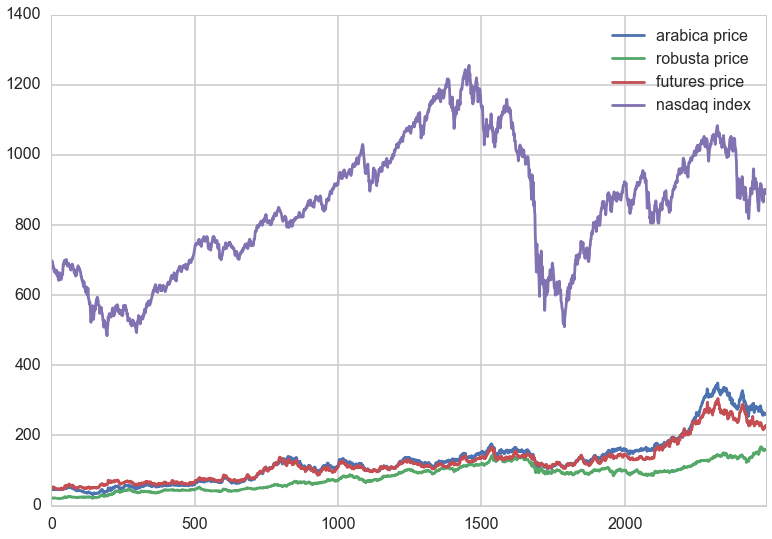

In [69]:
#plot daily data
df.loc[:,['arabica price','robusta price', 'futures price', 'nasdaq index']].plot()

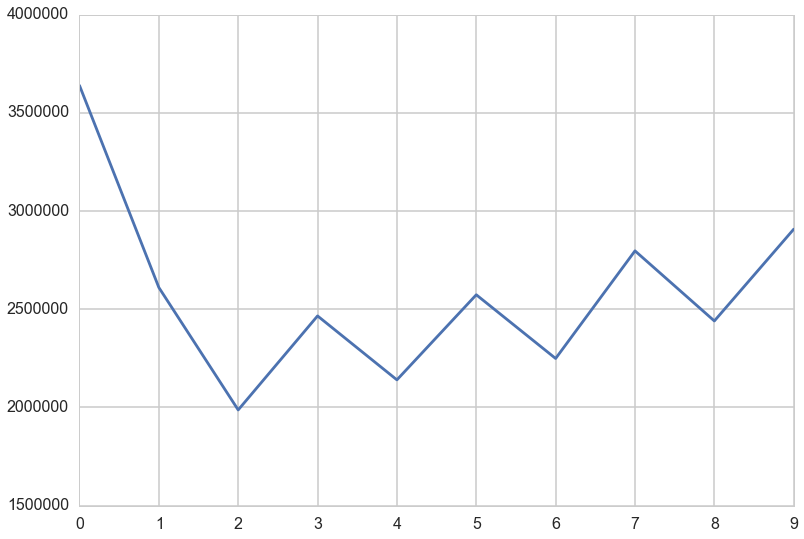

In [23]:
#plot yearly data
plt.plot(prod_df.index, prod_df["prv year prod"])

resources:
    http://www.investopedia.com/university/commodities/commodities2.asp
    http://www.ico.org/new_historical.asp?section=Statistics
    http://www.wikinvest.com/commodity/Coffee#_note-3